In [84]:
import numpy as np
from numpy import pi, cos, sin, log, sqrt, exp
import matplotlib.pyplot as plt
from matplotlib import cm

# Reloading the module
import importlib

import SEM2D_Element
importlib.reload(SEM2D_Element)
from SEM2D_Element import *

import SEM2D_Grid
importlib.reload(SEM2D_Grid)
from SEM2D_Grid import *

import SEM2D_Curve
importlib.reload(SEM2D_Curve)
from SEM2D_Curve import *

import SEM2D_Line
importlib.reload(SEM2D_Line)
from SEM2D_Line import *

import SEM2D_EdgeCommon
importlib.reload(SEM2D_EdgeCommon)
from SEM2D_EdgeCommon import *

import LinearSystem_4thPDE
importlib.reload(LinearSystem_4thPDE)
from LinearSystem_4thPDE import *

import Utilities_4thPDE
importlib.reload(Utilities_4thPDE)
from Utilities_4thPDE import *

In [85]:
element_list = []
c1 = np.array([0, -1])
c2 = np.array([2, 0])
c3 = np.array([1, 1])
c4 = np.array([0, 1])

# Create Element 0

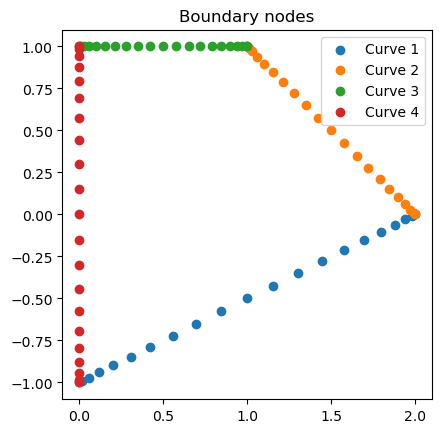

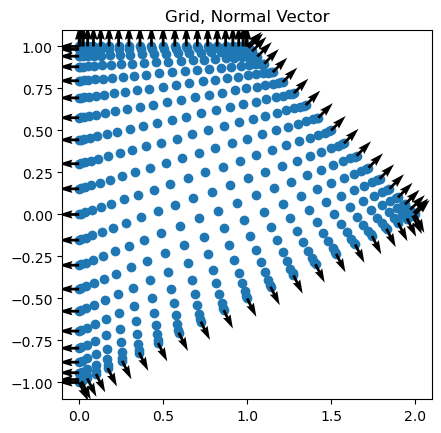

In [86]:
# Corner coordinates
x1 = c1
x2 = c2
x3 = c3
x4 = c4
corners = [x1, x2, x3, x4]

# Curves
# Curve 1
curve1 = Line(20, 'Legendre', x1, x2)
# Curve 2
curve2 = Line(20, 'Legendre', x2, x3)
# Curve 3
curve3 = Line(20, 'Legendre', x4, x3)
# Curve 4
curve4 = Line(20, 'Legendre', x1, x4)

# Collecting the boundary curves
curves = [curve1, curve2, curve3, curve4]
mark_curves = ['boundary', 'boundary', 'boundary', 'boundary']

# Grid
Nx = 22
Ny = 20
node_type_x = "Legendre"
node_type_y = "Legendre"
grid = Grid(Nx, Ny, node_type_x, node_type_y)

idx = 0
shape = 'quad'
element = Element(idx, shape, grid, curves, corners, mark_curves)

element_list.append(element)

element.visualizing_curves()
element.visualizing_Grid_NormalVector()

# Create common edges

In [87]:
edgecommon_list = []

# Construct and solve the linear system

In [88]:
set_Uth_S_RHS_BC_SingleElement_ver1(element_list)

In [89]:
C, d, ind_1st = MatEqnConverter_Collocation_Init(element_list)

In [90]:
locations = [(1,1,1,1)]
func_one = lambda x, y: 1
func_zero = lambda x, y : 0
A_list = [[func_zero, func_zero, func_one, func_zero, func_zero],
          [func_zero, func_zero, func_zero, func_zero], 
          [func_one, func_zero, func_zero], 
          [func_zero, func_zero], 
          [func_zero]]
C, d, ind_1st = MatEqnConverter_Collocation_InnerNodes(C, d, ind_1st, element_list, locations, A_list)

In [91]:
# Dirichlet BCs
A_list = [[func_one, func_zero, func_zero, func_zero, func_zero],
          [func_zero, func_zero, func_zero, func_zero], 
          [func_zero, func_zero, func_zero], 
          [func_zero, func_zero], 
          [func_zero]]
location = [1, 0, 0, 0]
C, d, ind_1st = MatEqnConverter_Collocation_BC(C, d, ind_1st, element_list[0], element_list, location, A_list)
location = [3, 0, 0, 0]
C, d, ind_1st = MatEqnConverter_Collocation_BC(C, d, ind_1st, element_list[0], element_list, location, A_list)
location = [2, 0, 1, 1]
C, d, ind_1st = MatEqnConverter_Collocation_BC(C, d, ind_1st, element_list[0], element_list, location, A_list)
location = [4, 0, 1, 1]
C, d, ind_1st = MatEqnConverter_Collocation_BC(C, d, ind_1st, element_list[0], element_list, location, A_list)

Abs error 1.341060595905219e-10
Rel error 5.71489463644697e-12


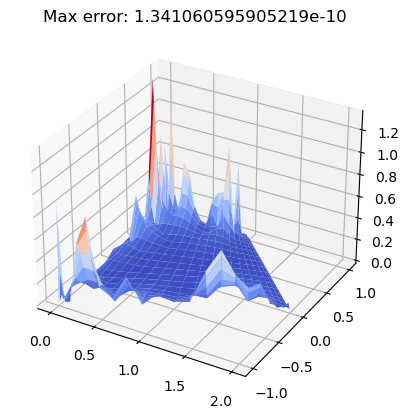

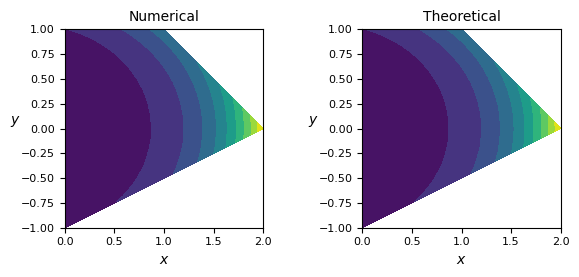

In [92]:
# Solve the system
MatEqnSolver_NonsquareCollocation(C, d, element_list)
# Visualization of error
visualization_error(element_list)
# Visualization of the solution
visualization_solution_2Dcontour(element_list)

# Max abs error
error_max_list = []
for element in element_list:
    error_max_list.append( np.max(np.abs(element.U - element.U_th)) )
err_maxabs = np.max(error_max_list)
print('Abs error', err_maxabs)
U_maxabs = np.max(np.abs(element.U))
err_maxabs_rel = err_maxabs / U_maxabs
print('Rel error', err_maxabs_rel)

## Test2

Abs error 7.636671250921268e-08
Rel error 6.764129020363622e-09


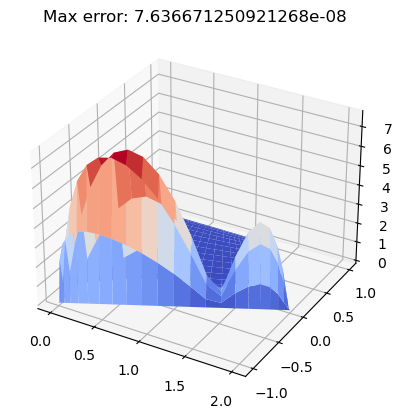

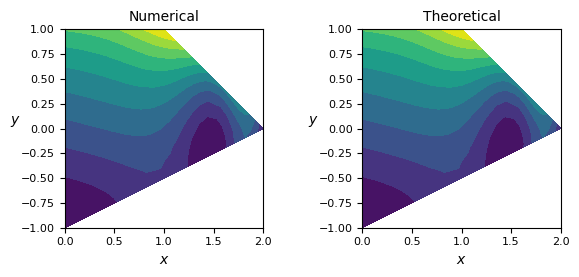

In [93]:
set_Uth_S_RHS_BC_SingleElement_ver2(element_list)

C, d, ind_1st = MatEqnConverter_Collocation_Init(element_list)

locations = [(1,1,1,1)]
func_one = lambda x, y: 1
func_zero = lambda x, y : 0
A_list = [[func_zero, func_zero, func_one, func_zero, func_zero],
          [func_zero, func_zero, func_zero, func_zero], 
          [func_one, func_zero, func_zero], 
          [func_zero, func_zero], 
          [func_zero]]
C, d, ind_1st = MatEqnConverter_Collocation_InnerNodes(C, d, ind_1st, element_list, locations, A_list)


# Dirichlet BCs
A_list = [[func_one, func_zero, func_zero, func_zero, func_zero],
          [func_zero, func_zero, func_zero, func_zero], 
          [func_zero, func_zero, func_zero], 
          [func_zero, func_zero], 
          [func_zero]]
location = [1, 0, 0, 0]
C, d, ind_1st = MatEqnConverter_Collocation_BC(C, d, ind_1st, element_list[0], element_list, location, A_list)
location = [3, 0, 0, 0]
C, d, ind_1st = MatEqnConverter_Collocation_BC(C, d, ind_1st, element_list[0], element_list, location, A_list)
location = [2, 0, 1, 1]
C, d, ind_1st = MatEqnConverter_Collocation_BC(C, d, ind_1st, element_list[0], element_list, location, A_list)
location = [4, 0, 1, 1]
C, d, ind_1st = MatEqnConverter_Collocation_BC(C, d, ind_1st, element_list[0], element_list, location, A_list)

# Solve the system
MatEqnSolver_NonsquareCollocation(C, d, element_list)
# Visualization of error
visualization_error(element_list)
# Visualization of the solution
visualization_solution_2Dcontour(element_list)

# Max abs error
error_max_list = []
for element in element_list:
    error_max_list.append( np.max(np.abs(element.U - element.U_th)) )
err_maxabs = np.max(error_max_list)
print('Abs error', err_maxabs)
U_maxabs = np.max(np.abs(element.U))
err_maxabs_rel = err_maxabs / U_maxabs
print('Rel error', err_maxabs_rel)